<a href="https://colab.research.google.com/github/sayem1997/AIPII/blob/master/Assignments/Lab_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to AI Programming II:: Assignment #3 (Lab)  -- Total: 50 pts(Each points are 10 pts.)

### Write your information in below. 
### Student ID:   20192024                     
### Name: SAYEM MD KHALEQUZZAMAN CHOWDHURY 

In [1]:
# import tensorflow & keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
#Download mnist data from MNIST server
img_rows = 28
img_cols = 28
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


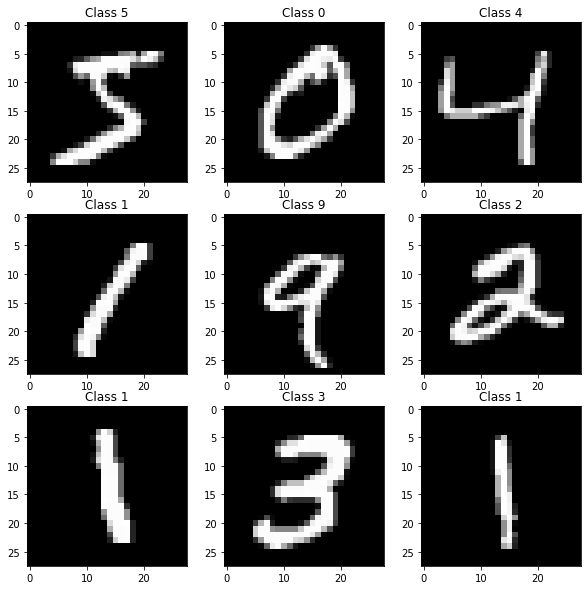

In [4]:
# Visualize images of the MNIST dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [5]:
# check the shape of training data
print(x_train.shape)
# check the shape of test data
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
# flatten training and test datasets to 1-d
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [7]:
x_train[0].shape, x_test[0].shape

((784,), (784,))

In [8]:
# observe the shapes of training data after the reshape
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [0]:
# 1,2,3,... 10 :One Hot coding
num_classes = 10
from keras.utils import np_utils
# reshape labels categorically
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
print(y_train[0])
print(y_test[0])
y_train.shape,y_test.shape
print(x_train.shape[1])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
784


In [0]:
def make_model(num_layers):
    model= Sequential()
    if num_layers == 0:
        model.add(Dense(output_dim= num_classes, input_dim = x_train.shape[1], activation='softmax'))
        model.compile(loss='mse', optimizer = 'sgd', metrics=['accuracy'])
        return model
    
    for i in range(num_layers):
        if i == 0:
            model.add(Dense(output_dim = 32, input_dim = x_train.shape[1], activation='sigmoid'))
        else:
            model.add(Dense(output_dim = 10, activation='sigmoid'))
    model.add(Dense(output_dim = num_classes, activation="softmax"))
    model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
    return model

In [12]:
(x_train.shape[1],)
#num_hidden_neurons = 32
model = make_model(num_layers=1)

model.summary()
history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data  =(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="sigmoid", units=32)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  del sys.path[0]


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.0920 - accuracy: 0.1145 - val_loss: 0.0918 - val_accuracy: 0.1163
Epoch 2/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0915 - accuracy: 0.1363 - val_loss: 0.0914 - val_accuracy: 0.1385
Epoch 3/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.0911 - accuracy: 0.1582 - val_loss: 0.0909 - val_accuracy: 0.1608
Epoch 4/5
60000/60000 [=

In [13]:
#evaluate the test loss

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09019516682624817
Test accuracy: 0.19709999859333038


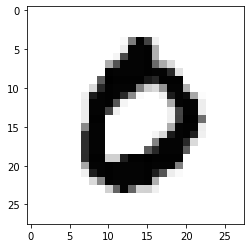

The Answer is  [7]


In [14]:
# test the model through visually debugging the inputs,,  run > twice to see the image
# index of your input to test
n = 3
# see the image by plotting
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')  
plt.show()

# your model's prediction, is the output correct?
print('The Answer is ', model.predict_classes(x_test[n].reshape((1, 28* 28) ) ) )


## 1. Report the result of the test loss & accuracy, when we set the dimension(neurons) of hidden layer to (64, 128, 256) with one hidden layer.
## *** Default condition : refer in the above codes.. 
## *** You have to write your codes in another blank area, and write your answer in below.

> 들여쓴 블록


| dimension |      test loss     |    test accuracy      |
|-----------|--------------------|-----------------------|
|   64      |            0.08923        |         0.2160              |
|-----------|--------------------|-----------------------|
|   128     |            0.0887        |        0.2494               | 
|-----------|--------------------|-----------------------|
|   256     |         0.0887           |           0.2224            |





In [0]:
# Write your answer in here
def make_model(num_layers, neurons, act='sigmoid'):
    model= Sequential()
    if num_layers == 0:
        model.add(Dense(output_dim= num_classes, input_dim = x_train.shape[1], activation='softmax'))
        model.compile(loss='mse', optimizer = 'sgd', metrics=['accuracy'])
        return model
    
    for i in range(num_layers):
            model.add(Dense(output_dim = neurons, input_dim = x_train.shape[1], activation=act))
    
    model.add(Dense(output_dim = num_classes, activation="softmax"))
    
    model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
    return model
  
dimensions = [64, 128, 256]
for dimension in dimensions:
  model = make_model(1, dimension, 'sigmoid')
  model.summary()
  history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data  =(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Accuracy for ', dimension, ' number of neorons:')
  print('Test loss:', score[0])
  print('Test accuracy:', score[1], '\n\n')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="sigmoid", units=64)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if sys.path[0] == '':


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.0921 - accuracy: 0.0848 - val_loss: 0.0916 - val_accuracy: 0.0840
Epoch 2/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0911 - accuracy: 0.0977 - val_loss: 0.0908 - val_accuracy: 0.1018
Epoch 3/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.0905 - accuracy: 0.1323 - val_loss: 0.0902 - val_accuracy: 0.1518
Epoch 4/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0899 - accuracy: 0.1811 - val_loss: 0.0897 - val_accuracy: 0.1941
Epoch 5/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0894 - accuracy: 0.2116 - val_loss: 0.0892 - val_accuracy: 0.2160
Accuracy for  64  number of neorons:
Test loss: 0.08923925380706788
Test accuracy: 0.2160000056028366 


Model: "sequential_3"
_________________________________________________________________
Layer (type)               

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="sigmoid", units=128)`
  # Remove the CWD from sys.path while we load stuff.


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.0917 - accuracy: 0.0909 - val_loss: 0.0909 - val_accuracy: 0.1084
Epoch 2/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0905 - accuracy: 0.1543 - val_loss: 0.0901 - val_accuracy: 0.2010
Epoch 3/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0899 - accuracy: 0.2068 - val_loss: 0.0896 - val_accuracy: 0.2214
Epoch 4/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0894 - accuracy: 0.2233 - val_loss: 0.0891 - val_accuracy: 0.2388
Epoch 5/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0889 - accuracy: 0.2380 - val_loss: 0.0887 - val_accuracy: 0.2494
Accuracy for  128  number of neorons:
Test loss: 0.0887090433716774
Test accuracy: 0.24940000474452972 


Model: "sequential_4"
_________________________________________________________________
Layer (type)              

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="sigmoid", units=256)`
  # Remove the CWD from sys.path while we load stuff.


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.0918 - accuracy: 0.1049 - val_loss: 0.0908 - val_accuracy: 0.1138
Epoch 2/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0903 - accuracy: 0.1451 - val_loss: 0.0900 - val_accuracy: 0.1550
Epoch 3/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0897 - accuracy: 0.1729 - val_loss: 0.0895 - val_accuracy: 0.1735
Epoch 4/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0893 - accuracy: 0.1902 - val_loss: 0.0891 - val_accuracy: 0.1945
Epoch 5/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.0889 - accuracy: 0.2106 - val_loss: 0.0888 - val_accuracy: 0.2225
Accuracy for  256  number of neorons:
Test loss: 0.0887875679731369
Test accuracy: 0.2224999964237213 




## 2. Report the result of the test loss & accuracy, when we set the number of hidden layer to (2, 4, 8)  
## *** Default condition : refer in the above codes and each hidden layer have same neurons(number of neurons: 128) 
## *** You have to write your codes in another blank area, and write your answer in below.

> 들여쓴 블록


| layer's num |      test loss     |    test accuracy      |
|-------------|--------------------|-----------------------|
|   2         |            0.090        |                 0.1155      |
|-------------|--------------------|-----------------------|
|   4         |             0.0902       |         0.1134              | 
|-------------|--------------------|-----------------------|
|   8         |           0.09017         |                0.10279       |



In [0]:
# Write your answer in here 
layers = [2, 4, 8]
for layer in layers:
  model = make_model(layer, 128, 'sigmoid')
  model.summary()
  history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data  =(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Accuracy for ', layer, ' number of layers:')
  print('Test loss:', score[0])
  print('Test accuracy:', score[1], '\n\n')



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="sigmoid", units=128)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  if sys.path[0] == '':


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.0913 - accuracy: 0.1124 - val_loss: 0.0908 - val_accuracy: 0.1141
Epoch 2/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.0905 - accuracy: 0.1126 - val_loss: 0.0904 - val_accuracy: 0.1145
Epoch 3/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.0903 - accuracy: 0.1131 - val_loss: 0.0902 - val_accuracy: 0.1145
Epoch 4/5
60000/60000 [==============================] - 1s 19us/step - loss: 0.0901 - accuracy: 0.1128 - val_loss: 0.0901 - val_accuracy: 0.1149
Epoch 5/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.0901 - accuracy: 0.1129 - val_loss: 0.0900 - val_accuracy: 0.1155
Accuracy for  2  number of layers:
Test loss: 0.09000792063474655
Test accuracy: 0.11550000309944153 


Model: "sequential_6"
_________________________________________________________________
Layer (type)                

## 3. Report the result of the test loss & accuracy, when we set the number of batch size to (64, 128, 256) 
## *** Default condition : refer in the above codes,  use "relu" activation, dropout rate(0.2) and each hidden layer have same neurons(number of neurons: 256) 
## *** You have to write your codes in another blank area, and write your answer in below.

> 들여쓴 블록


| batch size  |      test loss     |    test accuracy      |
|-------------|--------------------|-----------------------|
|   64        |  0.089791                 |   0.1683                |
|-------------|--------------------|-----------------------|
|   128       |       0.0899        |        0.1288               | 
|-------------|--------------------|-----------------------|
|   256       |      0.0899574              |            0.103699            |



In [15]:
# Write your answer in here
def make_model(num_layers, neurons, act='sigmoid'):
    model= Sequential()
    if num_layers == 0:
        model.add(Dense(output_dim= num_classes, input_dim = x_train.shape[1], activation='softmax'))
        model.compile(loss='mse', optimizer = 'sgd', metrics=['accuracy'])
        return model
    
    for i in range(num_layers):
            model.add(Dense(output_dim = neurons, input_dim = x_train.shape[1], activation=act))
            model.add(Dropout(0.2))
    
    model.add(Dense(output_dim = num_classes, activation="softmax"))
    
    model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
    return model

#fixing previous code

batch_sizes = [64, 128, 256]
for batch_size in batch_sizes:
  model = make_model(8, 256, 'relu')
  history = model.fit(x_train, y_train, batch_size = batch_size, epochs = 5, validation_data  =(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Accuracy for ', batch_size, ' Batch Size:')
  print('Test loss:', score[0])
  print('Test accuracy:', score[1], '\n\n')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=256)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  del sys.path[0]


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.0901 - accuracy: 0.1052 - val_loss: 0.0899 - val_accuracy: 0.1576
Epoch 2/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.0900 - accuracy: 0.1050 - val_loss: 0.0899 - val_accuracy: 0.1753
Epoch 3/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.0900 - accuracy: 0.1091 - val_loss: 0.0899 - val_accuracy: 0.1727
Epoch 4/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.0900 - accuracy: 0.1102 - val_loss: 0.0898 - val_accuracy: 0.1696
Epoch 5/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.0900 - accuracy: 0.1138 - val_loss: 0.0898 - val_accuracy: 0.1683
Accuracy for  64  Batch Size:
Test loss: 0.08979160019159317
Test accuracy: 0.16830000281333923 


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 57us/step 

## 4. Report the result of the test loss & accuracy, when we set the number of epochs to (100, 200, 300)
*** Default condition :same with the above problem 3

*** You have to write your codes in another blank area, and write your answer in below.


| epochs      |      test loss     |    test accuracy      |
|-------------|--------------------|-----------------------|
|   100       |         0.1818           |  0.8941                     |
|-------------|--------------------|-----------------------|
|   200       |          0.0072          |   0.9534                    | 
|-------------|--------------------|-----------------------|
|   300       |       0.00527            |   0.9674                    |

In [0]:
# Write your answer in here

model = make_model(8, 256, 'relu')
history = model.fit(x_train, y_train, batch_size = 64, epochs = 100, validation_data  =(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy for ', 100, ' epochs:')
print('Test loss:', score[0])
print('Test accuracy:', score[1], '\n\n')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=256)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  del sys.path[0]


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.0901 - accuracy: 0.0974 - val_loss: 0.0900 - val_accuracy: 0.0683
Epoch 2/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0901 - accuracy: 0.1010 - val_loss: 0.0900 - val_accuracy: 0.0713
Epoch 3/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.0900 - accuracy: 0.1030 - val_loss: 0.0900 - val_accuracy: 0.0785
Epoch 4/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.0900 - accuracy: 0.1029 - val_loss: 0.0899 - val_accuracy: 0.0929
Epoch 5/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.0900 - accuracy: 0.1050 - val_loss: 0.0899 - val_accuracy: 0.1167
Epoch 6/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.0900 - accuracy: 0.1075 - val_loss: 0.0899 - val_accuracy: 0.1424
Epoch 7/100
60000/60000 [==============================] - 3s 

In [0]:
# Write your answer in here

model = make_model(8, 256, 'relu')
history = model.fit(x_train, y_train, batch_size = 64, epochs = 200, validation_data  =(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy for ', 200, ' epochs:')
print('Test loss:', score[0])
print('Test accuracy:', score[1], '\n\n')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=256)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  del sys.path[0]


Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 4s 62us/step - loss: 0.0900 - accuracy: 0.1066 - val_loss: 0.0899 - val_accuracy: 0.1030
Epoch 2/200
60000/60000 [==============================] - 3s 58us/step - loss: 0.0900 - accuracy: 0.1091 - val_loss: 0.0899 - val_accuracy: 0.1010
Epoch 3/200
60000/60000 [==============================] - 3s 56us/step - loss: 0.0900 - accuracy: 0.1107 - val_loss: 0.0899 - val_accuracy: 0.1005
Epoch 4/200
60000/60000 [==============================] - 4s 59us/step - loss: 0.0899 - accuracy: 0.1138 - val_loss: 0.0899 - val_accuracy: 0.1009
Epoch 5/200
60000/60000 [==============================] - 4s 59us/step - loss: 0.0899 - accuracy: 0.1138 - val_loss: 0.0898 - val_accuracy: 0.1029
Epoch 6/200
60000/60000 [==============================] - 3s 58us/step - loss: 0.0899 - accuracy: 0.1169 - val_loss: 0.0898 - val_accuracy: 0.1059
Epoch 7/200
60000/60000 [==============================] - 3s 

In [0]:
# Write your answer in here

model = make_model(8, 256, 'relu')
history = model.fit(x_train, y_train, batch_size = 64, epochs = 300, validation_data  =(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy for ', 300, ' epochs:')
print('Test loss:', score[0])
print('Test accuracy:', score[1], '\n\n')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=256)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  del sys.path[0]


Train on 60000 samples, validate on 10000 samples
Epoch 1/300
60000/60000 [==============================] - 4s 60us/step - loss: 0.0900 - accuracy: 0.1029 - val_loss: 0.0899 - val_accuracy: 0.1218
Epoch 2/300
60000/60000 [==============================] - 3s 57us/step - loss: 0.0900 - accuracy: 0.1047 - val_loss: 0.0899 - val_accuracy: 0.1458
Epoch 3/300
60000/60000 [==============================] - 3s 57us/step - loss: 0.0900 - accuracy: 0.1080 - val_loss: 0.0899 - val_accuracy: 0.1740
Epoch 4/300
60000/60000 [==============================] - 3s 57us/step - loss: 0.0900 - accuracy: 0.1058 - val_loss: 0.0899 - val_accuracy: 0.1953
Epoch 5/300
60000/60000 [==============================] - 3s 56us/step - loss: 0.0899 - accuracy: 0.1098 - val_loss: 0.0899 - val_accuracy: 0.2074
Epoch 6/300
60000/60000 [==============================] - 3s 57us/step - loss: 0.0899 - accuracy: 0.1168 - val_loss: 0.0898 - val_accuracy: 0.2152
Epoch 7/300
60000/60000 [==============================] - 3s 

## 5. Plot the test loss & test accuracy about the above result(Problem 4: Epochs- 300) 


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


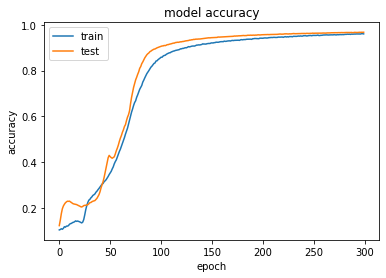

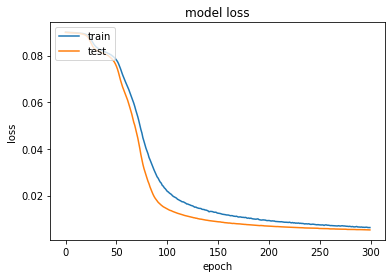

In [0]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

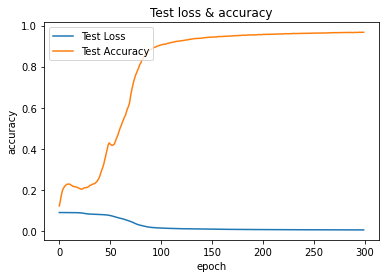

In [0]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('Test loss & accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Test Loss', 'Test Accuracy'], loc='upper left')
plt.show()
